# **Scoring system & EDA** 📊

In this notebook we have EDA and scoring function for Social and Enviromental factor

1. load the data

In [ ]:
import pandas as pd
df = ('/content/Large-scale_Renewable_Projects_Reported_by_NYSERDA__Beginning_2004_20250118.csv')
df = pd.read_csv(df)
df.head()

,Data Through Date,Eligibility,Project Name,Solicitation Name,Inflation Adjustment,Fixed REC Price,Index (O)REC Strike Price,Incremental Economic Benefits Claimed,Project Met Economic Benefits Threshold,Renewable Technology,...,Year of Delivery Start Date,Contract Duration,New Renewable Capacity (MW),Bid Capacity (MW),Bid Quantity (MWh),Max Annual Contract Quantity (MWh),P10 Annual OREC Exceedance,P50 Generation calculated by NYSERDA (MWh/yr),Transmission Capacity (HVDC),Georeference
0,12/11/2024,Non-Tier 1,"401 Fieldcrest Dr. Elmsford, NY 10523",2554,NaN,32.22,NaN,Yes,Yes,Fuel Cell,...,2015.0,10.0,0.8,0.76,6325.0,6325.0,NaN,NaN,NaN,POINT (-73.81937 41.05419)
1,12/11/2024,Non-Tier 1,AES Greenidge,1168,NaN,19.25,NaN,Yes,NaN,Biomass,...,NaN,3.0,4.0,NaN,28500.0,28500.0,NaN,NaN,NaN,POINT (-77.0553 42.66363)
2,12/11/2024,Tier 1,Alabama Solar Park,RESRFP20-1,NaN,NaN,NaN,Yes,NaN,Solar,...,NaN,20.0,130.0,130.00,258508.0,310209.0,NaN,NaN,NaN,POINT (-78.27071 43.06599)
3,12/11/2024,Non-Tier 1,Albany 1,1851,NaN,13.85,NaN,NaN,NaN,Biogas - LFG,...,2011.0,10.0,0.9,0.86,5625.0,5625.0,NaN,NaN,NaN,POINT (-73.79864 42.69493)
4,12/11/2024,Non-Tier 1,Albany 2,2226,NaN,14.95,NaN,Yes,Yes,Biogas - LFG,...,2012.0,10.0,3.2,3.00,22340.0,22340.0,NaN,NaN,NaN,POINT (-73.79864 42.69493)


2. handle missing values & data preprocessing

In [ ]:
import pandas as pd

# Select only numeric columns and compute their mean
numeric_cols = df.select_dtypes(include=['number'])

# Fill NaN values in numeric columns with their respective mean
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
df

'''
if needed replace Nan values with 'Unknown'

df['ZIP Code'].fillna('Unknown', inplace=True)  # Replace NaN ZIP codes with 'Unknown'
df['County/Province'].fillna('Unknown', inplace=True)
df['State/Province'].fillna('Unknown', inplace=True)
df['Georeference'].fillna('Unknown', inplace=True)
'''

,Data Through Date,Eligibility,Project Name,Solicitation Name,Inflation Adjustment,Fixed REC Price,Index (O)REC Strike Price,Incremental Economic Benefits Claimed,Project Met Economic Benefits Threshold,Renewable Technology,...,Year of Delivery Start Date,Contract Duration,New Renewable Capacity (MW),Bid Capacity (MW),Bid Quantity (MWh),Max Annual Contract Quantity (MWh),P10 Annual OREC Exceedance,P50 Generation calculated by NYSERDA (MWh/yr),Transmission Capacity (HVDC),Georeference
0,12/11/2024,Non-Tier 1,"401 Fieldcrest Dr. Elmsford, NY 10523",2554,NaN,32.220000,76.386446,Yes,Yes,Fuel Cell,...,2015.000000,10.0,0.80,0.760000,6325.0,6325.0,4.983863e+06,3769500.0,1275.0,POINT (-73.81937 41.05419)
1,12/11/2024,Non-Tier 1,AES Greenidge,1168,NaN,19.250000,76.386446,Yes,NaN,Biomass,...,2017.816456,3.0,4.00,89.852761,28500.0,28500.0,4.983863e+06,3769500.0,1275.0,POINT (-77.0553 42.66363)
2,12/11/2024,Tier 1,Alabama Solar Park,RESRFP20-1,NaN,18.778348,76.386446,Yes,NaN,Solar,...,2017.816456,20.0,130.00,130.000000,258508.0,310209.0,4.983863e+06,3769500.0,1275.0,POINT (-78.27071 43.06599)
3,12/11/2024,Non-Tier 1,Albany 1,1851,NaN,13.850000,76.386446,NaN,NaN,Biogas - LFG,...,2011.000000,10.0,0.90,0.860000,5625.0,5625.0,4.983863e+06,3769500.0,1275.0,POINT (-73.79864 42.69493)
4,12/11/2024,Non-Tier 1,Albany 2,2226,NaN,14.950000,76.386446,Yes,Yes,Biogas - LFG,...,2012.000000,10.0,3.20,3.000000,22340.0,22340.0,4.983863e+06,3769500.0,1275.0,POINT (-73.79864 42.69493)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,12/11/2024,Tier 1,West River Solar,RESRFP19-1,NaN,18.778348,65.180000,Yes,NaN,Solar,...,2017.816456,20.0,19.99,19.990000,33446.0,40135.0,4.983863e+06,3769500.0,1275.0,POINT (-73.65232 43.19646)
280,12/11/2024,Non-Tier 1,Wethersfield,1168,NaN,15.250000,76.386446,Yes,Yes,Land Based Wind,...,2009.000000,10.0,126.00,119.700000,314572.0,314572.0,4.983863e+06,3769500.0,1275.0,POINT (-78.13413 42.64198)
281,12/11/2024,Tier 1,"White Creek Solar, LLC",RESRFP22-1,NaN,18.778348,87.000000,Yes,NaN,Solar,...,2027.000000,20.0,135.00,135.000000,268450.0,322140.0,4.983863e+06,3769500.0,1275.0,POINT (-77.85233 42.8284)
282,12/11/2024,Tier 1,Yellow Barn Solar,RESRFP21-1,NaN,18.778348,76.386446,Yes,NaN,Solar,...,2017.816456,20.0,160.00,160.000000,299886.0,359863.0,4.983863e+06,3769500.0,1275.0,POINT (-76.49907 42.5343)


In [ ]:
# Convert date columns to datetime format if they are not already
df['Data Through Date'] = pd.to_datetime(df['Data Through Date'], errors='coerce')


In [ ]:
print(df.dtypes)

Data Through Date                                datetime64[ns]
Eligibility                                              object
Project Name                                             object
Solicitation Name                                        object
Inflation Adjustment                                     object
Fixed REC Price                                         float64
Index (O)REC Strike Price                               float64
Incremental Economic Benefits Claimed                    object
Project Met Economic Benefits Threshold                  object
Renewable Technology                                     object
Generation Type                                          object
Type of Existing                                         object
Counterparty                                             object
Developer Name                                           object
Energy Storage Power Capacity  (MWac)                   float64
Energy Storage Energy Capacity (MWh)    

In [ ]:
!pip install matplotlib seaborn numpy

**New Renewable Capacity (MW) refers to the amount of electricity generation capacity from renewable energy sources that has been newly added or installed within a specific time period, typically measured in megawatts (MW).**

  Renewable Technology  New Renewable Capacity (MW)
0         Biogas - ADG                    11.690000
1         Biogas - LFG                    60.100000
2              Biomass                    73.260000
3            Fuel Cell                     5.130000
4        Hydroelectric                   688.691846


<ipython-input-257-957bba3485ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Renewable Technology', y='New Renewable Capacity (MW)', palette='viridis')


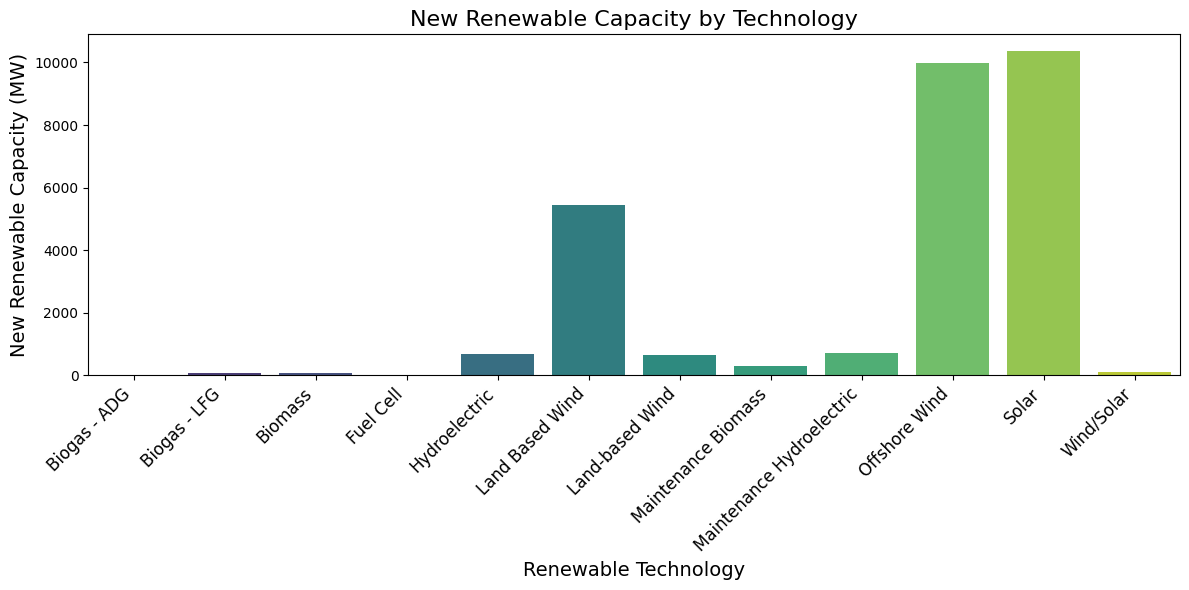

In [ ]:
# Assuming 'New Renewable Capacity (MW)' exists
grouped_data = df.groupby('Renewable Technology')['New Renewable Capacity (MW)'].sum().reset_index()

# Check the grouped data to confirm the columns
print(grouped_data.head())

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Renewable Technology', y='New Renewable Capacity (MW)', palette='viridis')

# Customize the plot
plt.title('New Renewable Capacity by Technology', fontsize=16)
plt.xlabel('Renewable Technology', fontsize=14)
plt.ylabel('New Renewable Capacity (MW)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


3. Calculate enviromental score 🌿

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Normalize only the 'New Renewable Capacity (MW)' column
'''
Why ?

Effect: The smallest "New Renewable Capacity (MW)" value will be scaled to 0,
and the largest will be scaled to 1.
The intermediate values will be scaled proportionally between 0 and 1.
'''
scaler = MinMaxScaler()

# Ensure 'New Renewable Capacity (MW)' is not NaN
df = df.dropna(subset=['New Renewable Capacity (MW)'])

# Fit and transform the 'New Renewable Capacity (MW)' column to scale between 0 and 1
df['Normalized Capacity'] = scaler.fit_transform(df[['New Renewable Capacity (MW)']])

# Convert normalized capacity into a score between 0 and 100 (the format we want)
df['Project Score'] = df['Normalized Capacity'] * 100

# View the top projects sorted by their new score
df_sorted = df.sort_values(by='Project Score', ascending=False)
print(df_sorted[['Project Name', 'New Renewable Capacity (MW)', 'Project Score']].head())


                 Project Name  New Renewable Capacity (MW)  Project Score
14       Attentive Energy One                       1404.0     100.000000
91           Excelsior Wind A                       1314.0      93.589744
64  Community Offshore Wind 1                       1314.0      93.589744
88              Empire Wind 2                       1260.0      89.743590
24                Beacon Wind                       1230.0      87.606838


<ipython-input-259-8a718df76802>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_projects, x='Renewable Technology', y='Project Score', palette='viridis')


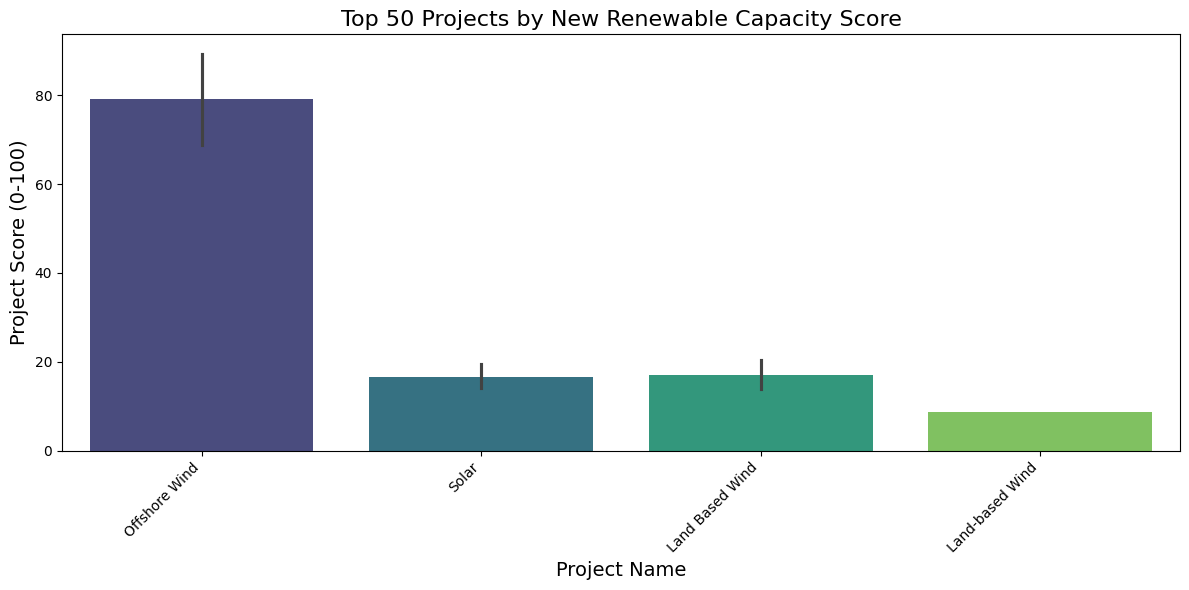

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 projects by score
top_projects = df_sorted.head(50)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_projects, x='Renewable Technology', y='Project Score', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 50 Projects by New Renewable Capacity Score', fontsize=16)
plt.ylabel('Project Score (0-100)', fontsize=14)
plt.xlabel('Project Name', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
df.shape

(284, 40)

4. generate synthetic data

In [ ]:
print(updated_df.dtypes)

Data Through Date                                datetime64[ns]
Eligibility                                              object
Project Name                                             object
Solicitation Name                                        object
Inflation Adjustment                                     object
Fixed REC Price                                         float64
Index (O)REC Strike Price                               float64
Incremental Economic Benefits Claimed                    object
Project Met Economic Benefits Threshold                  object
Renewable Technology                                     object
Generation Type                                          object
Type of Existing                                         object
Counterparty                                             object
Developer Name                                           object
Energy Storage Power Capacity  (MWac)                   float64
Energy Storage Energy Capacity (MWh)    

In [ ]:
'''
Columns we want to keep:

Project Name   , Renewable Technology , Energy Storage Power Capacity  (MWac)                   float64
Energy Storage Energy Capacity (MWh)                    float64, ZIP Code                                                 object
County/Province                                          object
State/Province     , Georeference
'''

'\nProject Name   , Renewable Technology , Energy Storage Power Capacity  (MWac)                   float64\nEnergy Storage Energy Capacity (MWh)                    float64, ZIP Code                                                 object\nCounty/Province                                          object\nState/Province     , Georeference \n'

In [ ]:
# Get unique zip codes
unique_zip_codes = df['ZIP Code'].unique()

# Print the unique zip codes
print("Unique Zip Codes in the dataset:")
for zip_code in unique_zip_codes:
    print(zip_code)

Unique Zip Codes in the dataset:
10523
14527
14125
12205
14806
14065
14009
13676
12910
14063
10601
11374
nan
12980
14737
12834
13027
14062
14826
14572
18101
14094
13327
12969
12912
14867
13602
14024
12477
13865
12920
13670
14224
14028
14855
14701
14058
14808
12962
13035
12158
13625
13357
17257
13682
12154
13026
12828
13329
13339
13667
13459
14877
12923
13069
12137
12118
12173
12883
14422
14850
13478
12051
12117
12937
13140
13601
13148
13160
12042
12095
12087
13416
13071
14423
12090
14103
14456
14411
13780
J0X2L
12010
14145
14510
14530
13365
13045
14823
14709
13040
13338
12780
19087
13619
13368
12525
14432
13367
14101
12072
13021
16836
14174
13317
14807
10036
13681
13502
14304
14011
12917
13662
13668
10307
14561
14569
12973
14873
13746
12068
10591
13617
14067
12737
10990
13622
13404
12043
13605
12047
13147
12056
13476
13340
13165
12521
12804
13159
14012
14775
12822
14218
13757
10550
13425
13041
13669
12166
14462
14048
12070
13642
14143
13827
12157
13635
13452
13656
14066
12590
14891
128

Generete an artificial data - columsn with income by zipcode

In [ ]:
import pandas as pd
import numpy as np



# List of zip codes provided
zip_codes = [
    10523, 14527, 14125, 12205, 14806, 14065, 14009, 13676, 12910, 14063, 10601,
    11374, np.nan, 12980, 14737, 12834, 13027, 14062, 14826, 14572, 18101, 14094,
    13327, 12969, 12912, 14867, 13602, 14024, 12477, 13865, 12920, 13670, 14224,
    14028, 14855, 14701, 14058, 14808, 12962, 13035, 12158, 13625, 13357, 17257,
    13682, 12154, 13026, 12828, 13329, 13339, 13667, 13459, 14877, 12923, 13069,
    12137, 12118, 12173, 12883, 14422, 14850, 13478, 12051, 12117, 12937, 13140,
    13601, 13148, 13160, 12042, 12095, 12087, 13416, 13071, 14423, 12090, 14103,
    14456, 14411, 13780, 'J0X2L', 12010, 14145, 14510, 14530, 13365, 13045, 14823,
    14709, 13040, 13338, 12780, 19087, 13619, 13368, 12525, 14432, 13367, 14101,
    12072, 13021, 16836, 14174, 13317, 14807, 10036, 13681, 13502, 14304, 14011,
    12917, 13662, 13668, 10307, 14561, 14569, 12973, 14873, 13746, 12068, 10591,
    13617, 14067, 12737, 10990, 13622, 13404, 12043, 13605, 12047, 13147, 12056,
    13476, 13340, 13165, 12521, 12804, 13159, 14012, 14775, 12822, 14218, 13757,
    10550, 13425, 13041, 13669, 12166, 14462, 14048, 12070, 13642, 14143, 13827,
    12157, 13635, 13452, 13656, 14066, 12590, 14891, 12831, 14533, 14882
]

# Function to generate income based on zip code
def generate_income(zip_code):
    if isinstance(zip_code, str) and zip_code != 'nan':
        # For non-numeric zip codes like 'J0X2L', you can choose to assign a default income or skip
        return np.round(np.random.uniform(20000, 200000))  # Random value for non-numeric zip codes
    else:
        # For numeric zip codes, generate income based on the zip code
        return np.round(np.random.uniform(30000, 120000))  # Random income range for now

# Add generated household income to your existing DataFrame
df['Household_Income'] = df['ZIP Code'].apply(generate_income)

# Optionally, save the updated DataFrame to a new CSV file
df.to_csv('updated_with_income.csv', index=False)

# Display the first few rows of the updated dataset
df.head(3)


,Data Through Date,Eligibility,Project Name,Solicitation Name,Inflation Adjustment,Fixed REC Price,Index (O)REC Strike Price,Incremental Economic Benefits Claimed,Project Met Economic Benefits Threshold,Renewable Technology,...,Bid Capacity (MW),Bid Quantity (MWh),Max Annual Contract Quantity (MWh),P10 Annual OREC Exceedance,P50 Generation calculated by NYSERDA (MWh/yr),Transmission Capacity (HVDC),Georeference,Normalized Capacity,Project Score,Household_Income
0,2024-12-11,Non-Tier 1,"401 Fieldcrest Dr. Elmsford, NY 10523",2554,NaN,32.220000,76.386446,Yes,Yes,Fuel Cell,...,0.760000,6325.0,6325.0,4.983863e+06,3769500.0,1275.0,POINT (-73.81937 41.05419),0.000570,0.056980,129492.0
1,2024-12-11,Non-Tier 1,AES Greenidge,1168,NaN,19.250000,76.386446,Yes,NaN,Biomass,...,89.852761,28500.0,28500.0,4.983863e+06,3769500.0,1275.0,POINT (-77.0553 42.66363),0.002849,0.284900,137927.0
2,2024-12-11,Tier 1,Alabama Solar Park,RESRFP20-1,NaN,18.778348,76.386446,Yes,NaN,Solar,...,130.000000,258508.0,310209.0,4.983863e+06,3769500.0,1275.0,POINT (-78.27071 43.06599),0.092593,9.259259,47325.0


In [ ]:
 # List of columns to keep
columns_to_keep = [
    'Project Name',
    'Renewable Technology',
    'Energy Storage Power Capacity  (MWac)',
    'Energy Storage Energy Capacity (MWh)',
    'New Renewable Capacity (MW)',
    'ZIP Code',
    'County/Province',
    'State/Province',
    'Georeference',
    'Household_Income'
]

# Keep only the specified columns
df_filtered = df[columns_to_keep]

# Display the resulting DataFrame
df_filtered

,Project Name,Renewable Technology,Energy Storage Power Capacity (MWac),Energy Storage Energy Capacity (MWh),New Renewable Capacity (MW),ZIP Code,County/Province,State/Province,Georeference,Household_Income
0,"401 Fieldcrest Dr. Elmsford, NY 10523",Fuel Cell,96.133333,75.428571,0.80,10523,Westchester,NY,POINT (-73.81937 41.05419),129492.0
1,AES Greenidge,Biomass,96.133333,75.428571,4.00,14527,Yates,NY,POINT (-77.0553 42.66363),137927.0
2,Alabama Solar Park,Solar,20.000000,80.000000,130.00,14125,Genesee,NY,POINT (-78.27071 43.06599),47325.0
3,Albany 1,Biogas - LFG,96.133333,75.428571,0.90,12205,Albany,NY,POINT (-73.79864 42.69493),113785.0
4,Albany 2,Biogas - LFG,96.133333,75.428571,3.20,12205,Albany,NY,POINT (-73.79864 42.69493),150479.0
...,...,...,...,...,...,...,...,...,...,...
279,West River Solar,Solar,96.133333,75.428571,19.99,12831,Saratoga,NY,POINT (-73.65232 43.19646),39800.0
280,Wethersfield,Land Based Wind,96.133333,75.428571,126.00,14066,Wyoming,NY,POINT (-78.13413 42.64198),79316.0
281,"White Creek Solar, LLC",Solar,96.133333,75.428571,135.00,14533,Livingston,NY,POINT (-77.85233 42.8284),27629.0
282,Yellow Barn Solar,Solar,96.133333,75.428571,160.00,14882,Tompkins,NY,POINT (-76.49907 42.5343),45363.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Normalize only the 'New Renewable Capacity (MW)' column
scaler = MinMaxScaler()

# Ensure 'New Renewable Capacity (MW)' is not NaN
df_filtered = df_filtered.dropna(subset=['New Renewable Capacity (MW)'])

# Fit and transform the 'New Renewable Capacity (MW)' column to scale between 0 and 1
df_filtered['Normalized Capacity'] = scaler.fit_transform(df[['New Renewable Capacity (MW)']])

# Convert normalized capacity into a score between 0 and 100
df_filtered['Environmental Score'] = df_filtered['Normalized Capacity'] * 100

# View the top projects sorted by their new score
df_filtered = df_filtered.sort_values(by='Environmental Score', ascending=False)
print(df_filtered[['Project Name', 'New Renewable Capacity (MW)', 'Environmental Score']].head())

                 Project Name  New Renewable Capacity (MW)  \
14       Attentive Energy One                       1404.0   
91           Excelsior Wind A                       1314.0   
64  Community Offshore Wind 1                       1314.0   
88              Empire Wind 2                       1260.0   
24                Beacon Wind                       1230.0   

    Environmental Score  
14           100.000000  
91            93.589744  
64            93.589744  
88            89.743590  
24            87.606838  


Calculate Social factor 🖖

In [ ]:
# Function to assign a more diverse social score based on household income
def generate_social_score(income):
    if income < 20000:
        return 100  # Very low-income, highest need for social support
    elif income < 30000:
        return 90   # Low-income, significant need for social programs
    elif income < 40000:
        return 75   # Lower-income, but less need than the lowest range
    elif income < 50000:
        return 60   # Low-middle income
    elif income < 60000:
        return 45   # Middle income with moderate need
    elif income < 70000:
        return 30   # Upper-middle income, lower need for social support
    elif income < 80000:
        return 20   # High-middle income, low need for support
    elif income < 100000:
        return 10   # High income, very low need for social programs
    else:
        return 5    # Very high income, minimal need for social support

# Apply the function to the DataFrame to generate the social score
df_filtered['Social Score'] = df_filtered['Household_Income'].apply(generate_social_score)

# Optionally, save the DataFrame to a CSV file
df_filtered.to_csv('updated_dataset.csv', index=False)

# Display the resulting DataFrame
df_filtered.head(3)


,Project Name,Renewable Technology,Energy Storage Power Capacity (MWac),Energy Storage Energy Capacity (MWh),New Renewable Capacity (MW),ZIP Code,County/Province,State/Province,Georeference,Household_Income,Normalized Capacity,Environmental Score,Social Score
14,Attentive Energy One,Offshore Wind,96.133333,75.428571,1404.0,Unknown,Unknown,Unknown,Unknown,107707.0,1.000000,100.000000,5
91,Excelsior Wind A,Offshore Wind,96.133333,75.428571,1314.0,Unknown,Unknown,Unknown,Unknown,143635.0,0.935897,93.589744,5
64,Community Offshore Wind 1,Offshore Wind,96.133333,75.428571,1314.0,Unknown,Unknown,Unknown,Unknown,168641.0,0.935897,93.589744,5


Plot the data

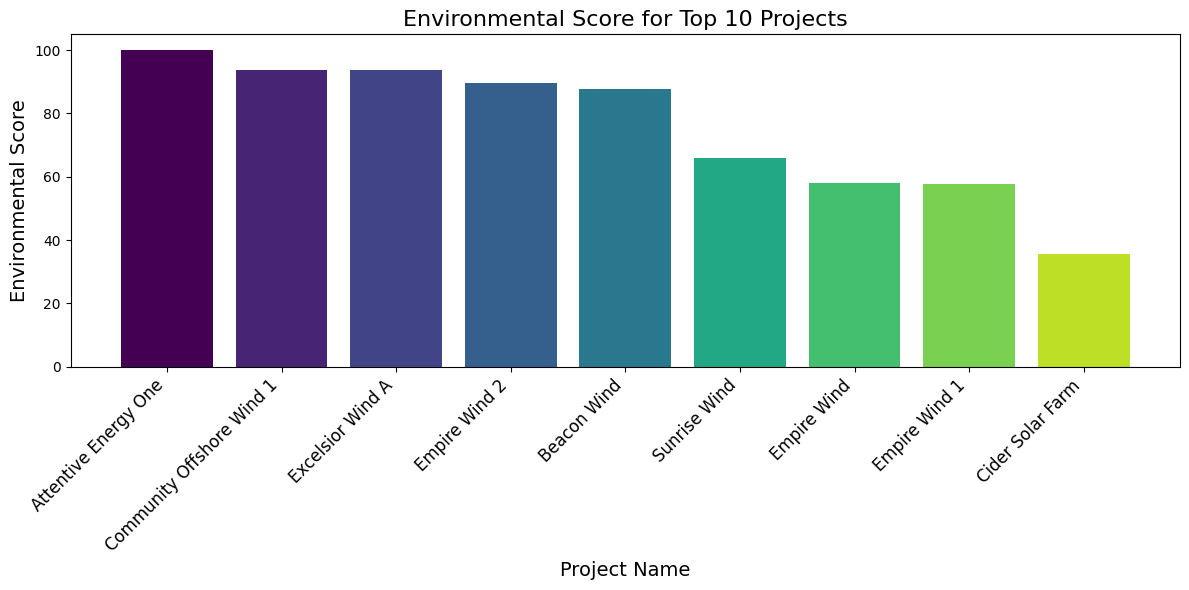

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_filtered is the dataframe containing your project data
# Sorting the dataframe by Social Score in descending order to get the top 100 projects
top_projects = df_filtered.sort_values(by='Environmental Score', ascending=False).head(10)

# Generate a colormap from 'viridis' based on the number of projects
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(top_projects)) for i in range(len(top_projects))]

# Plot the environmental score by project type for the top 100 projects
plt.figure(figsize=(12, 6))
plt.bar(top_projects['Project Name'], top_projects['Environmental Score'], color=colors)

# Adding labels and title
plt.xlabel('Project Name', fontsize=14)
plt.ylabel('Environmental Score', fontsize=14)
plt.title('Environmental Score for Top 10 Projects', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
print(top_projects['Environmental Score'].describe())


count    10.000000
mean      3.418414
std       3.081862
min       0.056980
25%       0.668091
50%       2.466524
75%       6.712963
max       7.264957
Name: Environmental Score, dtype: float64


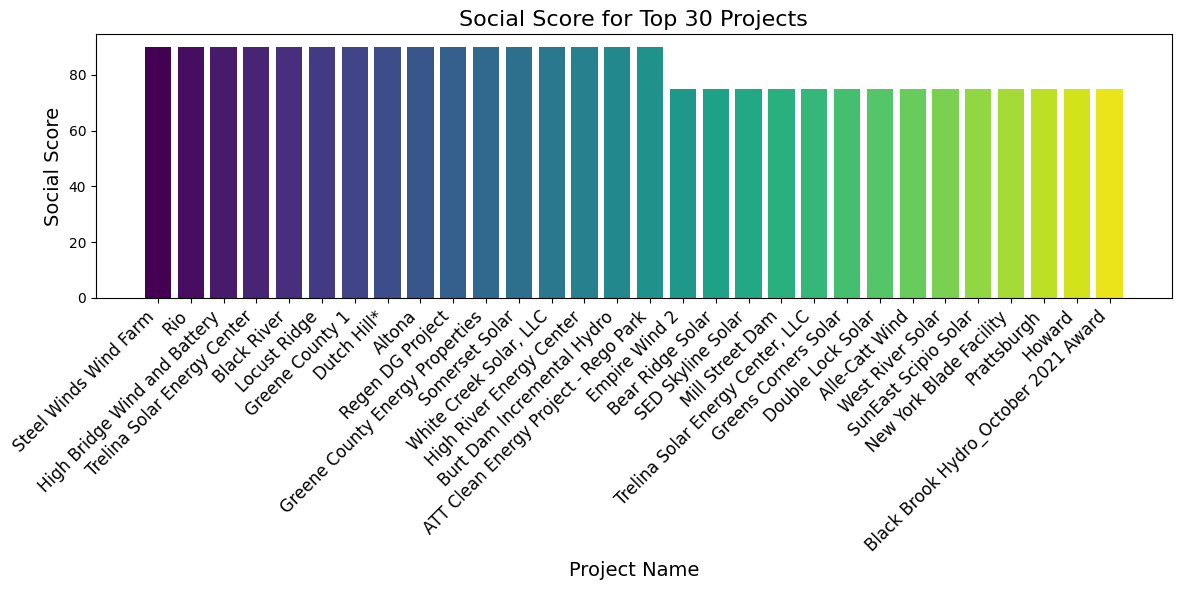

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_filtered is the dataframe containing your project data
# Sorting the dataframe by Social Score in descending order to get the top 10 projects
top_projects = df_filtered.sort_values(by='Social Score', ascending=False).head(30)

# Generate a colormap from 'viridis' based on the number of projects
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(top_projects)) for i in range(len(top_projects))]

# Plot the environmental score by project type for the top 10 projects
plt.figure(figsize=(12, 6))
plt.bar(top_projects['Project Name'], top_projects['Social Score'], color=colors)

# Adding labels and title
plt.xlabel('Project Name', fontsize=14)
plt.ylabel('Social Score', fontsize=14)
plt.title('Social Score for Top 30 Projects', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



save the dataset

In [ ]:
# Save the DataFrame with the updated social scores to a CSV file
#df_filtered.to_csv('updated_dataset(score).csv', index=False)

Dataset saved successfully as 'updated_dataset.csv'.


In [ ]:
#sanity check
df_filtered.head(3)

,Project Name,Renewable Technology,Energy Storage Power Capacity (MWac),Energy Storage Energy Capacity (MWh),New Renewable Capacity (MW),ZIP Code,County/Province,State/Province,Georeference,Household_Income,Normalized Capacity,Environmental Score,Social Score
14,Attentive Energy One,Offshore Wind,96.133333,75.428571,1404.0,Unknown,Unknown,Unknown,Unknown,107707.0,1.000000,100.000000,5
91,Excelsior Wind A,Offshore Wind,96.133333,75.428571,1314.0,Unknown,Unknown,Unknown,Unknown,143635.0,0.935897,93.589744,5
64,Community Offshore Wind 1,Offshore Wind,96.133333,75.428571,1314.0,Unknown,Unknown,Unknown,Unknown,168641.0,0.935897,93.589744,5
